### 독립표본 t-검정

In [2]:
import pandas as pd
df = pd.read_excel('data/car.xlsx')

In [6]:
import pingouin as pg
a = df.query('model == "Avante"').price
k = df.query('model == "K3"').price
pg.mwu(a, k) # 맨-휘트니 U 검정

# 0.011169 < 0.05
# 귀무가설(Avante와 K3의 모집단이 같다)는 기각
# 가격대는 다르다가 결론

,U-val,alternative,p-val,RBC,CLES
MWU,5627.5,two-sided,0.011169,0.204312,0.397844


In [7]:
pg.anova(dv='price', between='model', data=df) 
# 에타제곱 = 1.1%
# 중고차마다 가격이 다 다른데, 그게 아반떼 또는 K3라서 다른 부분은 1.1% 밖에 안 됨

,Source,ddof1,ddof2,F,p-unc,np2
0,model,1,272,3.038673,0.082432,0.011048


In [9]:
# 에타제곱 계산
pg.compute_effsize(a, k, eftype='eta-square')

0.0145019821151075

In [10]:
# 코헨의 d
pg.compute_effsize(a, k, eftype='cohen')

-0.2426139679066563

### 대응표본 t-검정

In [11]:
cp = pd.read_excel('data/couple.xlsx')

In [14]:
cp

,husband,wife
0,117,121
1,108,101
2,105,102
3,89,114
4,101,103
5,93,105
6,96,101
7,108,131
8,108,96
9,94,109


In [13]:
pg.ttest(cp['husband'], cp['wife'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.986887,19,two-sided,0.007578,"[-13.61, -2.39]",0.84451,6.46,0.947372


In [20]:
(-13.61 - -2.39)  / 2 # 차이의 평균

-5.609999999999999

In [15]:
# 귀무가설: '차이의 평균 = 0' (남편과 아내가 가사노동 시간이 같다)
# p=0.007 < 0.05 => 귀무가설 기각
# 남편과 아내가 가사노동시간이 다르다 (평균 -8 +- 5.6시간)

In [17]:
pg.ttest(cp['husband'], cp['wife'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.670574,38,two-sided,0.011083,"[-14.06, -1.94]",0.84451,4.588,0.739761


In [21]:
(-14.06 - -1.94) / 2 # 평균의 차이

-6.0600000000000005

### 분산 분석

In [22]:
pg.homoscedasticity(data=df, group='model', dv='price')
# Levene의 등분산성 검정
# 귀무가설: 집단별 분산이 같다.
# p < 0.05 => 집단별로 분산이 다르다.

,W,pval,equal_var
levene,22.092071,0.000004,False


In [27]:
# 귀무가설을 기각 못 했을 경우: 등분산인 경우
pg.anova(data=df, between='model', dv='price', detailed=True) # dv: dependent variable

,Source,SS,DF,MS,F,p-unc,np2
0,model,3.336811e+05,1,333681.127484,3.038673,0.082432,0.011048
1,Within,2.986872e+07,272,109811.457010,NaN,NaN,NaN


In [28]:
# 귀무가설을 기각해서 이분산인 경우
pg.welch_anova(data=df, between='model', dv='price')

,Source,ddof1,ddof2,F,p-unc,np2
0,model,1,196.691919,4.888567,0.028187,0.011048


In [25]:
pg.ttest(a, k) # 집단이 2개일 때는 t-검정의 p 와 분산분석의 p 가 같음

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


In [30]:
hr = pd.read_excel('data/hr.xlsx')
hr.head()

,department,job_level,marriage,rating,overtime
0,Sales,Salaried,single,4,14
1,Engineering,Hourly,single,4,8
2,Engineering,Hourly,single,4,4
3,Engineering,Salaried,married,4,0
4,Engineering,Hourly,married,2,21


In [32]:
hr.job_level.unique()

array(['Salaried', 'Hourly', 'Manager'], dtype=object)

In [34]:
pg.homoscedasticity(data=hr, group='job_level', dv='rating')
# 등분산성 검정: 귀무가설 기각 -> 분산이 다름 => 이분산이므로 welch_anova 분산분석

,W,pval,equal_var
levene,6.138372,0.002214,False


In [35]:
pg.welch_anova(data=hr, between='job_level', dv='rating')
# 이분산성을 보정하기 위해 웰치의 분산분석
# 귀무가설 기각 -> 결론: 어떤 집단의 평균이 다름

,Source,ddof1,ddof2,F,p-unc,np2
0,job_level,2,273.23336,198.666881,5.394990e-54,0.183206


In [37]:
pg.pairwise_gameshowell(dv='rating', between='job_level', data=hr) # hedges == Cohen'd
# 어느 집단과 어느 집단이 다른지 알기 위해 사후 분석
# 분산이 다르므로 Games-Howel 검정
# 분석 결과: 모든 집단이 서로 다른 것을 확인

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Hourly,Manager,2.566891,4.142857,-1.575966,0.086197,-18.283232,136.073046,0.0,-1.615057
1,Hourly,Salaried,2.566891,3.245399,-0.678508,0.060834,-11.153506,563.974875,0.0,-0.692385
2,Manager,Salaried,4.142857,3.245399,0.897458,0.096168,9.332215,199.708018,0.0,0.973631


In [39]:
cs = pd.read_excel('data/census.xlsx')
cs.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
cs['race'].nunique()

5

In [42]:
pg.homoscedasticity(data=cs, group='race', dv='education_num') # 등분산성 검정: 귀무가설 기각 -> 분산이 다름

,W,pval,equal_var
levene,45.022712,9.087050e-38,False


In [44]:
pg.welch_anova(dv='education_num', between='race', data=cs) # 분산분석: 귀무가설 기각 -> 어떤 집단은 평균이 다르다

,Source,ddof1,ddof2,F,p-unc,np2
0,race,4,1002.461498,98.900787,5.587944e-71,0.012023


In [43]:
pg.pairwise_gameshowell(dv='education_num', between='race', data=cs) # 사후 분석

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Amer-Indian-Eskimo,Asian-Pac-Islander,9.311897,10.960539,-1.648642,0.157391,-10.474821,609.952107,6.716849e-14,-0.609240
1,Amer-Indian-Eskimo,Black,9.311897,9.486236,-0.174338,0.137309,-1.269676,373.702957,7.100158e-01,-0.075815
2,Amer-Indian-Eskimo,Other,9.311897,8.841328,0.470569,0.235732,1.996198,481.494003,2.693623e-01,0.169382
3,Amer-Indian-Eskimo,White,9.311897,10.135246,-0.823349,0.131913,-6.241587,318.638097,1.377793e-08,-0.320662
4,Asian-Pac-Islander,Black,10.960539,9.486236,1.474303,0.096429,15.289039,1525.407513,0.000000e+00,0.605057
5,Asian-Pac-Islander,Other,10.960539,8.841328,2.119211,0.214510,9.879323,383.653706,1.132427e-13,0.729836
6,Asian-Pac-Islander,White,10.960539,10.135246,0.825293,0.088576,9.317304,1103.777621,0.000000e+00,0.319950
7,Black,Other,9.486236,8.841328,0.644907,0.200241,3.220658,294.238881,1.230253e-02,0.270338
8,Black,White,9.486236,10.135246,-0.649010,0.043906,-14.781777,4053.342645,2.768563e-12,-0.255095
9,Other,White,8.841328,10.135246,-1.293917,0.196580,-6.582146,273.349624,2.357437e-09,-0.502010


,W,pval,equal_var
levene,0.184354,0.668125,True


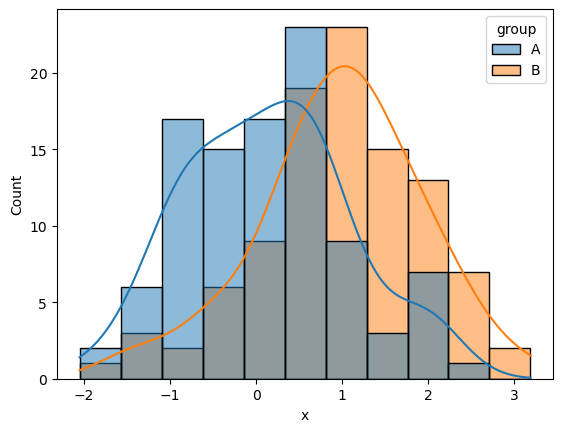

In [47]:
# 분산이 같을 경우 시뮬레이션
from scipy.stats import norm
import seaborn as sns

# 데이터 만들기
x1 = norm.rvs(loc=0.0, scale=1.0, size=100)
x2 = norm.rvs(loc=1.0, scale=1.0, size=100)
d = pd.concat([pd.DataFrame({'x': x1, 'group': 'A'}), pd.DataFrame({'x': x2, 'group': 'B'})]).reset_index()

# 히스토그램
sns.histplot(x='x', hue='group', data=d, kde=True)  

# 등분산성 검정
pg.homoscedasticity(dv='x', group='group', data=d) 

In [48]:
# 분산이 다를 경우 시뮬레이션, 아래만 고치면 됨
x1 = norm.rvs(loc=0.0, scale=1.0, size=100)  # 표준편차가 1.0
x2 = norm.rvs(loc=1.0, scale=2.0, size=100)  # 표준편차가 2.0

### 카이제곱 분포

In [50]:
# 카이제곱 적합도 검증
from scipy.stats import chisquare

# 50명에게 브랜드 선호도를 물었는데 A 브랜드를 선호하는 사람이 31명, B를 선호하는 사람이 19명
# 귀무가설: 두 브랜드에 차이가 없을 것이다 25:25일거다
chisquare([31, 19], [25, 25])  # p > 0.05 => 결론을 유보

Power_divergenceResult(statistic=2.88, pvalue=0.08968602177036435)

In [51]:
# 100명에게 브랜드 선호도를 물었는데 A 브랜드를 선호하는 사람이 62명, B를 선호하는 사람이 38명
# 귀무가설: 두 브랜드에 차이가 없을 것이다 50:50일거다
chisquare([62, 38], [50, 50])  # p < 0.05 => 귀무가설 기각 => 브랜드 선호도에 차이가 있다

Power_divergenceResult(statistic=5.76, pvalue=0.01639507184919225)

In [54]:
# 카이제곱 독립성 검증
display(hr.pivot_table(index='marriage', columns='department', aggfunc='size')), display(hr.pivot_table(index='department', columns='marriage', aggfunc='size'))

department,Engineering,Finance,Sales
marriage,,,
married,462,36,209
single,499,27,237


marriage,married,single
department,,
Engineering,462,499
Finance,36,27
Sales,209,237


(None, None)

In [57]:
# 카이제곱 검정
expected, observed, stats = pg.chi2_independence(x='marriage', y='department', data=hr)
stats
# 귀무가설: 부서별 결혼 비율에 차이가 없다
# p>0.05 => 결론을 유보

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,2.338180,2.0,0.310650,0.039882,0.257948
1,cressie-read,0.666667,2.337586,2.0,0.310742,0.039877,0.257891
2,log-likelihood,0.000000,2.340188,2.0,0.310338,0.039899,0.258141
3,freeman-tukey,-0.500000,2.345475,2.0,0.309518,0.039944,0.258649
4,mod-log-likelihood,-1.000000,2.353653,2.0,0.308255,0.040014,0.259435
5,neyman,-2.000000,2.378838,2.0,0.304398,0.040228,0.261856


In [63]:
from statsmodels.stats.contingency_tables import mcnemar
table = [[40,10],[20,30]]
m = mcnemar(table, exact=False, correction=False)
print(m)
# 귀무가설: 전후에 차이가 없다.
# 결과 p > 0.05 귀무가설 기각 못함
# 결론을 유보

pvalue      0.06788915486182893
statistic   3.3333333333333335


### 퀴즈

In [65]:
liar = pd.read_excel('data/liar.xlsx')

liar.head() 
# Creativity: 창의성점수(연속)
# Position: 등급(서열-순서가 있는 범주형)
# Novice: 초보자(1: 처음 나온 사람, 0: 경험자)

,Creativity,Position,Novice
0,53,1,0
1,36,3,1
2,31,4,0
3,43,2,0
4,30,4,1


In [66]:
# - Position별로 Creativity의 평균이 다른가?
# - Novice와 아닌 사람 사이에 Creativity가 다른가?
# - Novice와 아닌 사람 사이에 Position이 다른가?

In [72]:
liar['Position'].unique()
# 2개 이상 => 분산 분석 (여러 집단의 평균이 다른가?)

array([1, 3, 4, 2, 5, 6], dtype=int64)

In [73]:
# 등분산성 검정
pg.homoscedasticity(data=liar, group='Position', dv='Creativity')
# 분산이 다르다 기각 X

,W,pval,equal_var
levene,1.671988,0.15468,True


In [74]:
# 등분산 이므로 anova
pg.anova(dv='Creativity', between='Position', data=liar) 
# p < 0.05 귀무가설(모두 평균이 같다)를 기각 => 어떤 Position은 평균이 다르다

,Source,ddof1,ddof2,F,p-unc,np2
0,Position,5,62,4.808166,0.000887,0.279412


In [68]:
pg.pairwise_tukey(data=liar, between='Position', dv='Creativity')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,42.793103,42.200000,0.593103,2.278212,0.260337,0.999829,0.080492
1,1,3,42.793103,34.454545,8.338558,2.536571,3.287335,0.019798,1.211460
2,1,4,42.793103,32.750000,10.043103,2.860679,3.510741,0.010397,1.362572
3,1,5,42.793103,36.000000,6.793103,4.344379,1.563654,0.625067,0.808835
4,1,6,42.793103,48.000000,-5.206897,5.236959,-0.994260,0.918073,-0.696619
5,2,3,42.200000,34.454545,7.745455,2.843525,2.723892,0.084853,1.245019
6,2,4,42.200000,32.750000,9.450000,3.136069,3.013326,0.041506,1.345824
7,2,5,42.200000,36.000000,6.200000,4.530460,1.368514,0.745355,0.695762
8,2,6,42.200000,48.000000,-5.800000,5.392326,-1.075603,0.889197,-0.818591
9,3,4,34.454545,32.750000,1.704545,3.328494,0.512107,0.995521,0.302591


In [70]:
Novice = liar[liar['Novice']==1]
vice = liar[liar['Novice']==0]
pg.ttest(Novice['Creativity'], vice['Creativity'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.188868,63.88066,two-sided,0.032268,"[-8.05, -0.37]",0.533061,1.856,0.581197


In [71]:
pg.mwu(Novice['Position'], vice['Position'])

,U-val,alternative,p-val,RBC,CLES
MWU,646.5,two-sided,0.377171,-0.119481,0.55974
